In [ ]:
!pip install medmnist torch torchvision matplotlib numpy scikit-learn seaborn tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

Dataset: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
Clases: {'0': 'malignant', '1': 'normal, benign'}
Cargando datasets...
Train: 546 imágenes
Validación: 78 imágenes
Test: 156 imágenes


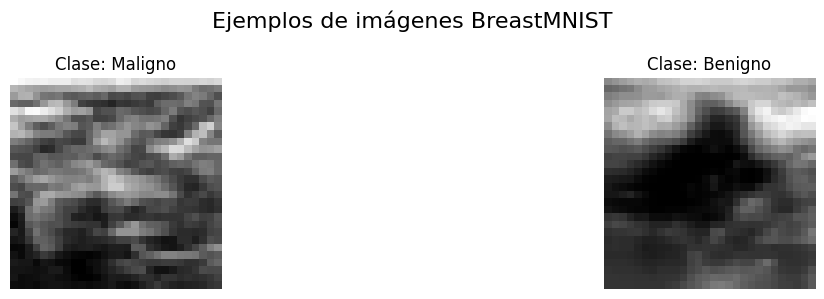


ENTRENANDO MODELOS PARA ENSAMBLAJE AVANZADO
Preparando datos para modelos tradicionales...
Forma de X_train: (546, 784)
Forma de y_train: (546,)

1. Entrenando Random Forest...
Random Forest - Precisión en validación: 0.8590

2. Entrenando SVM...
SVM - Precisión en validación: 0.8205

3. Entrenando Logistic Regression...
Logistic Regression - Precisión en validación: 0.8462

4. Entrenando Gradient Boosting...
Gradient Boosting - Precisión en validación: 0.8718

5. Entrenando Extra Trees...
Extra Trees - Precisión en validación: 0.8846

6. Entrenando MLP Classifier...
MLP Classifier - Precisión en validación: 0.8846

7. Entrenando CNN Simple...
Época 1/8, Loss: 0.5905, Val Acc: 73.08%
Época 2/8, Loss: 0.5575, Val Acc: 76.92%
Época 3/8, Loss: 0.5401, Val Acc: 76.92%
Época 4/8, Loss: 0.4974, Val Acc: 78.21%
Época 5/8, Loss: 0.5245, Val Acc: 79.49%
Época 6/8, Loss: 0.4752, Val Acc: 74.36%
Época 7/8, Loss: 0.4546, Val Acc: 83.33%
Época 8/8, Loss: 0.4876, Val Acc: 83.33%

8. Entrenando CNN 

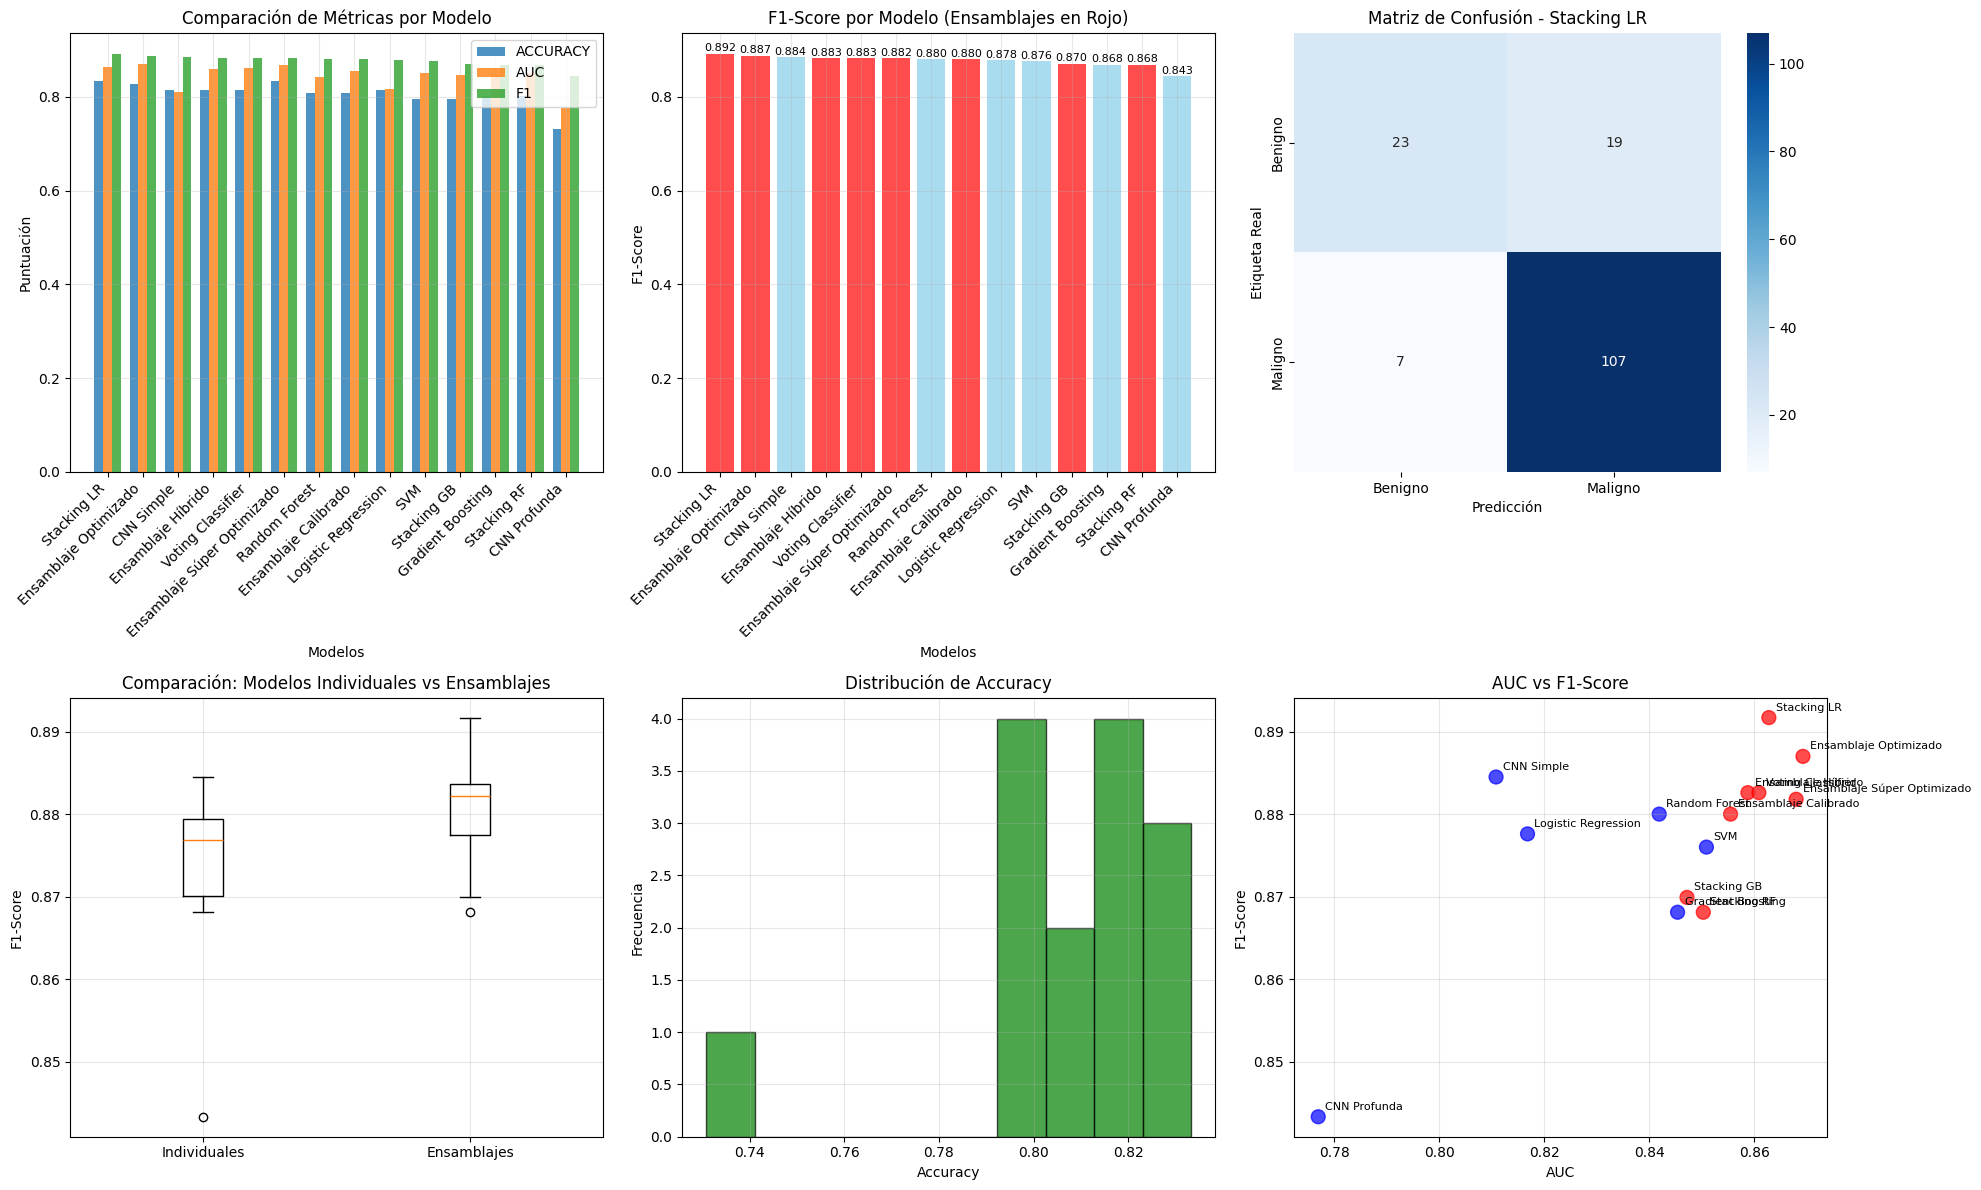


REPORTE FINAL

 MEJOR MODELO GENERAL: Stacking LR
   - Accuracy: 0.8333
   - AUC: 0.8628
   - F1-Score: 0.8917

 ANÁLISIS COMPARATIVO:
   - F1-Score promedio modelos individuales: 0.8716
   - F1-Score promedio ensamblajes: 0.8805
   - Mejora porcentual de ensamblajes: 1.02%

 TOP 3 MODELOS:
   1. Stacking LR: F1=0.8917, Acc=0.8333
   2. Ensamblaje Optimizado: F1=0.8870, Acc=0.8269
   3. CNN Simple: F1=0.8845, Acc=0.8141

 Los ensamblajes SÍ superan a los modelos individuales


In [ ]:
import medmnist
from medmnist import INFO
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import clone
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Configuración del dataset
data_flag = 'breastmnist'
download = True

# Información del dataset
info = INFO[data_flag]
print(f"Dataset: {info['description']}")
print(f"Clases: {info['label']}")

# Obtener la clase del dataset
DataClass = getattr(medmnist, info['python_class'])

# Transformaciones
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Cargar datasets
print("Cargando datasets...")
train_dataset = DataClass(split='train', transform=transform, download=download)
val_dataset = DataClass(split='val', transform=transform, download=download)
test_dataset = DataClass(split='test', transform=transform, download=download)

# DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

print(f'Train: {len(train_dataset)} imágenes')
print(f'Validación: {len(val_dataset)} imágenes')
print(f'Test: {len(test_dataset)} imágenes')

# Mostrar ejemplos del dataset
images, labels = next(iter(train_loader))
plt.figure(figsize=(15, 3))
class_names = ['Benigno', 'Maligno']

for i in range(2):
    plt.subplot(1, 2, i+1)
    img = images[i].squeeze() * 0.5 + 0.5
    img = torch.clamp(img, 0, 1)
    plt.imshow(img.permute(1, 2, 0) if img.ndim == 3 else img, cmap='gray')
    plt.title(f'Clase: {class_names[labels[i].item()]}')
    plt.axis('off')

plt.suptitle('Ejemplos de imágenes BreastMNIST', fontsize=16)
plt.tight_layout()
plt.show()

# ================================
# DEFINICIÓN DE MODELOS PARA ENSAMBLAJE
# ================================

# 1. Red Neuronal Convolucional simple
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Calculate the flattened size dynamically
        with torch.no_grad():
            dummy_input = torch.zeros(1, 1, 28, 28)
            dummy_output = self.pool2(self.relu2(self.conv2(self.pool1(self.relu1(self.conv1(dummy_input))))))
            flattened_size = dummy_output.view(1, -1).size(1)

        self.fc1 = nn.Linear(flattened_size, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, self.fc1.in_features)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# 2. Red más profunda
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        flattened_size = 64 * 3 * 3

        self.fc1 = nn.Linear(flattened_size, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, self.fc1.in_features)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Función para entrenar modelos CNN
def train_cnn_model(model, train_loader, val_loader, epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.squeeze().long()

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validación
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                labels = labels.squeeze().long()

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        train_losses.append(running_loss / len(train_loader))
        val_accuracies.append(val_accuracy)

        print(f'Época {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Val Acc: {val_accuracy:.2f}%')

    return model, train_losses, val_accuracies

# Función para obtener predicciones de CNN
def get_cnn_predictions(model, data_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            predictions.extend(probabilities.cpu().numpy())
            true_labels.extend(labels.squeeze().numpy())

    return np.array(predictions), np.array(true_labels)

# Función para convertir dataset a formato sklearn
def dataset_to_sklearn_format(dataset):
    """Convierte el dataset de PyTorch a formato sklearn"""
    X = []
    y = []

    for i in range(len(dataset)):
        image, label = dataset[i]
        X.append(image.numpy().flatten())
        y.append(label.item())

    return np.array(X), np.array(y)

# ================================
# CLASE PARA OPTIMIZACIÓN DE PESOS
# ================================

class OptimizedWeightEnsemble:
    def __init__(self, models):
        self.models = models
        self.weights = None

    def objective_function(self, weights, predictions, true_labels):
        """Función objetivo para optimización de pesos"""
        weights = weights / np.sum(weights)  # Normalizar
        ensemble_pred = np.average(predictions, axis=0, weights=weights)
        # Usar accuracy negativa como función a minimizar
        pred_classes = np.argmax(ensemble_pred, axis=1)
        return -accuracy_score(true_labels, pred_classes)

    def fit(self, X_val, y_val):
        """Optimiza pesos usando validación"""
        predictions = []
        for model in self.models:
            if hasattr(model, 'predict_proba'):
                pred = model.predict_proba(X_val)
            else:
                # Para modelos sin predict_proba, usar decision_function
                scores = model.decision_function(X_val)
                # Convertir a probabilidades usando sigmoid
                proba_pos = 1 / (1 + np.exp(-scores))
                pred = np.column_stack([1 - proba_pos, proba_pos])
            predictions.append(pred)

        predictions = np.array(predictions)

        # Optimización de pesos usando minimize
        n_models = len(self.models)
        initial_weights = np.ones(n_models) / n_models
        bounds = [(0.01, 1.0)] * n_models

        result = minimize(
            self.objective_function,
            initial_weights,
            args=(predictions, y_val),
            bounds=bounds,
            method='SLSQP'
        )

        self.weights = result.x / np.sum(result.x)
        print(f"Pesos optimizados: {dict(zip([f'Modelo_{i}' for i in range(len(self.weights))], self.weights))}")

    def predict_proba(self, X):
        """Predicción con pesos optimizados"""
        predictions = []
        for model in self.models:
            if hasattr(model, 'predict_proba'):
                pred = model.predict_proba(X)
            else:
                scores = model.decision_function(X)
                proba_pos = 1 / (1 + np.exp(-scores))
                pred = np.column_stack([1 - proba_pos, proba_pos])
            predictions.append(pred)

        return np.average(predictions, axis=0, weights=self.weights)

    def predict(self, X):
        """Predicción de clases"""
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

print("\n" + "="*60)
print("ENTRENANDO MODELOS PARA ENSAMBLAJE AVANZADO")
print("="*60)

# Convertir datasets a formato sklearn para modelos tradicionales
print("Preparando datos para modelos tradicionales...")
X_train, y_train = dataset_to_sklearn_format(train_dataset)
X_val, y_val = dataset_to_sklearn_format(val_dataset)
X_test, y_test = dataset_to_sklearn_format(test_dataset)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")

# ================================
# ENTRENAMIENTO DE MODELOS INDIVIDUALES EXPANDIDOS
# ================================

print("\n1. Entrenando Random Forest...")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_val_score = rf_model.score(X_val, y_val)
print(f"Random Forest - Precisión en validación: {rf_val_score:.4f}")

print("\n2. Entrenando SVM...")
svm_model = SVC(probability=True, random_state=42, C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
svm_val_score = svm_model.score(X_val, y_val)
print(f"SVM - Precisión en validación: {svm_val_score:.4f}")

print("\n3. Entrenando Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000, C=1.0)
lr_model.fit(X_train, y_train)
lr_val_score = lr_model.score(X_val, y_val)
print(f"Logistic Regression - Precisión en validación: {lr_val_score:.4f}")

print("\n4. Entrenando Gradient Boosting...")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
gb_model.fit(X_train, y_train)
gb_val_score = gb_model.score(X_val, y_val)
print(f"Gradient Boosting - Precisión en validación: {gb_val_score:.4f}")

print("\n5. Entrenando Extra Trees...")
et_model = ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1)
et_model.fit(X_train, y_train)
et_val_score = et_model.score(X_val, y_val)
print(f"Extra Trees - Precisión en validación: {et_val_score:.4f}")

print("\n6. Entrenando MLP Classifier...")
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)
mlp_val_score = mlp_model.score(X_val, y_val)
print(f"MLP Classifier - Precisión en validación: {mlp_val_score:.4f}")

print("\n7. Entrenando CNN Simple...")
cnn_simple = SimpleCNN()
cnn_simple, _, _ = train_cnn_model(cnn_simple, train_loader, val_loader, epochs=8)

print("\n8. Entrenando CNN Profunda...")
cnn_deep = DeepCNN()
cnn_deep, _, _ = train_cnn_model(cnn_deep, train_loader, val_loader, epochs=8)

# ================================
# CREACIÓN DE ENSAMBLAJES AVANZADOS
# ================================

print("\n" + "="*60)
print("CREANDO ENSAMBLAJES AVANZADOS")
print("="*60)

# Lista de modelos tradicionales para ensamblaje
traditional_models = [rf_model, svm_model, lr_model, gb_model, et_model, mlp_model]

# 1. STACKING CLASSIFIER - TÉCNICA PRINCIPAL
print("\n1. STACKING CLASSIFIER (Técnica Principal)...")

# Crear diferentes configuraciones de stacking
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

# Stacking con Logistic Regression como meta-learner
stacking_lr = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)

print("Entrenando Stacking con Logistic Regression...")
stacking_lr.fit(X_train, y_train)
stacking_lr_val_score = stacking_lr.score(X_val, y_val)
print(f"Stacking LR - Precisión en validación: {stacking_lr_val_score:.4f}")

# Stacking con Random Forest como meta-learner
stacking_rf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=42),
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)

print("Entrenando Stacking con Random Forest...")
stacking_rf.fit(X_train, y_train)
stacking_rf_val_score = stacking_rf.score(X_val, y_val)
print(f"Stacking RF - Precisión en validación: {stacking_rf_val_score:.4f}")

# Stacking con Gradient Boosting como meta-learner
stacking_gb = StackingClassifier(
    estimators=base_estimators,
    final_estimator=GradientBoostingClassifier(n_estimators=50, random_state=42),
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)

print("Entrenando Stacking con Gradient Boosting...")
stacking_gb.fit(X_train, y_train)
stacking_gb_val_score = stacking_gb.score(X_val, y_val)
print(f"Stacking GB - Precisión en validación: {stacking_gb_val_score:.4f}")

# 2. VOTING CLASSIFIER MEJORADO
print("\n2. Voting Classifier Mejorado...")
voting_classifier = VotingClassifier(
    estimators=base_estimators,
    voting='soft',
    n_jobs=-1
)

voting_classifier.fit(X_train, y_train)
voting_val_score = voting_classifier.score(X_val, y_val)
print(f"Voting Classifier - Precisión en validación: {voting_val_score:.4f}")

# 3. ENSAMBLAJE CON PESOS OPTIMIZADOS
print("\n3. Ensamblaje con Pesos Optimizados...")
optimized_ensemble = OptimizedWeightEnsemble(traditional_models)
optimized_ensemble.fit(X_val, y_val)
optimized_val_pred = optimized_ensemble.predict(X_val)
optimized_val_score = accuracy_score(y_val, optimized_val_pred)
print(f"Ensamblaje Optimizado - Precisión en validación: {optimized_val_score:.4f}")

# 4. ENSAMBLAJE CON CALIBRACIÓN
print("\n4. Ensamblaje con Calibración...")
calibrated_models = []
for i, model in enumerate(traditional_models[:3]):  # Usar solo los primeros 3 para velocidad
    print(f"Calibrando modelo {i+1}/3...")
    calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=3)
    calibrated.fit(X_train, y_train)
    calibrated_models.append(calibrated)

# Voting con modelos calibrados
calibrated_voting = VotingClassifier(
    estimators=[(f'cal_{i}', model) for i, model in enumerate(calibrated_models)],
    voting='soft'
)
calibrated_voting.fit(X_train, y_train)
calibrated_val_score = calibrated_voting.score(X_val, y_val)
print(f"Ensamblaje Calibrado - Precisión en validación: {calibrated_val_score:.4f}")

# ================================
# EVALUACIÓN COMPLETA EN CONJUNTO DE PRUEBA
# ================================

print("\n" + "="*60)
print("EVALUACIÓN COMPLETA EN CONJUNTO DE PRUEBA")
print("="*60)

models_results = {}

# Evaluar modelos individuales
print("\nModelos individuales:")

# Random Forest
rf_test_pred = rf_model.predict(X_test)
rf_test_proba = rf_model.predict_proba(X_test)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_test_auc = roc_auc_score(y_test, rf_test_proba[:, 1])
rf_test_f1 = f1_score(y_test, rf_test_pred)
models_results['Random Forest'] = {'accuracy': rf_test_acc, 'auc': rf_test_auc, 'f1': rf_test_f1}
print(f"Random Forest - Acc: {rf_test_acc:.4f}, AUC: {rf_test_auc:.4f}, F1: {rf_test_f1:.4f}")

# SVM
svm_test_pred = svm_model.predict(X_test)
svm_test_proba = svm_model.predict_proba(X_test)
svm_test_acc = accuracy_score(y_test, svm_test_pred)
svm_test_auc = roc_auc_score(y_test, svm_test_proba[:, 1])
svm_test_f1 = f1_score(y_test, svm_test_pred)
models_results['SVM'] = {'accuracy': svm_test_acc, 'auc': svm_test_auc, 'f1': svm_test_f1}
print(f"SVM - Acc: {svm_test_acc:.4f}, AUC: {svm_test_auc:.4f}, F1: {svm_test_f1:.4f}")

# Logistic Regression
lr_test_pred = lr_model.predict(X_test)
lr_test_proba = lr_model.predict_proba(X_test)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
lr_test_auc = roc_auc_score(y_test, lr_test_proba[:, 1])
lr_test_f1 = f1_score(y_test, lr_test_pred)
models_results['Logistic Regression'] = {'accuracy': lr_test_acc, 'auc': lr_test_auc, 'f1': lr_test_f1}
print(f"Logistic Regression - Acc: {lr_test_acc:.4f}, AUC: {lr_test_auc:.4f}, F1: {lr_test_f1:.4f}")

# Gradient Boosting
gb_test_pred = gb_model.predict(X_test)
gb_test_proba = gb_model.predict_proba(X_test)
gb_test_acc = accuracy_score(y_test, gb_test_pred)
gb_test_auc = roc_auc_score(y_test, gb_test_proba[:, 1])
gb_test_f1 = f1_score(y_test, gb_test_pred)
models_results['Gradient Boosting'] = {'accuracy': gb_test_acc, 'auc': gb_test_auc, 'f1': gb_test_f1}
print(f"Gradient Boosting - Acc: {gb_test_acc:.4f}, AUC: {gb_test_auc:.4f}, F1: {gb_test_f1:.4f}")

# CNNs
cnn_simple_pred_proba, cnn_simple_true_labels = get_cnn_predictions(cnn_simple, test_loader)
cnn_simple_pred_class = np.argmax(cnn_simple_pred_proba, axis=1)
cnn_simple_acc = accuracy_score(cnn_simple_true_labels, cnn_simple_pred_class)
cnn_simple_auc = roc_auc_score(cnn_simple_true_labels, cnn_simple_pred_proba[:, 1])
cnn_simple_f1 = f1_score(cnn_simple_true_labels, cnn_simple_pred_class)
models_results['CNN Simple'] = {'accuracy': cnn_simple_acc, 'auc': cnn_simple_auc, 'f1': cnn_simple_f1}
print(f"CNN Simple - Acc: {cnn_simple_acc:.4f}, AUC: {cnn_simple_auc:.4f}, F1: {cnn_simple_f1:.4f}")

cnn_deep_pred_proba, cnn_deep_true_labels = get_cnn_predictions(cnn_deep, test_loader)
cnn_deep_pred_class = np.argmax(cnn_deep_pred_proba, axis=1)
cnn_deep_acc = accuracy_score(cnn_deep_true_labels, cnn_deep_pred_class)
cnn_deep_auc = roc_auc_score(cnn_deep_true_labels, cnn_deep_pred_proba[:, 1])
cnn_deep_f1 = f1_score(cnn_deep_true_labels, cnn_deep_pred_class)
models_results['CNN Profunda'] = {'accuracy': cnn_deep_acc, 'auc': cnn_deep_auc, 'f1': cnn_deep_f1}
print(f"CNN Profunda - Acc: {cnn_deep_acc:.4f}, AUC: {cnn_deep_auc:.4f}, F1: {cnn_deep_f1:.4f}")

# Evaluar ensamblajes
print("\nEnsamblajes Avanzados:")

# Stacking LR
stacking_lr_pred = stacking_lr.predict(X_test)
stacking_lr_proba = stacking_lr.predict_proba(X_test)
stacking_lr_acc = accuracy_score(y_test, stacking_lr_pred)
stacking_lr_auc = roc_auc_score(y_test, stacking_lr_proba[:, 1])
stacking_lr_f1 = f1_score(y_test, stacking_lr_pred)
models_results['Stacking LR'] = {'accuracy': stacking_lr_acc, 'auc': stacking_lr_auc, 'f1': stacking_lr_f1}
print(f"Stacking LR - Acc: {stacking_lr_acc:.4f}, AUC: {stacking_lr_auc:.4f}, F1: {stacking_lr_f1:.4f}")

# Stacking RF
stacking_rf_pred = stacking_rf.predict(X_test)
stacking_rf_proba = stacking_rf.predict_proba(X_test)
stacking_rf_acc = accuracy_score(y_test, stacking_rf_pred)
stacking_rf_auc = roc_auc_score(y_test, stacking_rf_proba[:, 1])
stacking_rf_f1 = f1_score(y_test, stacking_rf_pred)
models_results['Stacking RF'] = {'accuracy': stacking_rf_acc, 'auc': stacking_rf_auc, 'f1': stacking_rf_f1}
print(f"Stacking RF - Acc: {stacking_rf_acc:.4f}, AUC: {stacking_rf_auc:.4f}, F1: {stacking_rf_f1:.4f}")

# Stacking GB
stacking_gb_pred = stacking_gb.predict(X_test)
stacking_gb_proba = stacking_gb.predict_proba(X_test)
stacking_gb_acc = accuracy_score(y_test, stacking_gb_pred)
stacking_gb_auc = roc_auc_score(y_test, stacking_gb_proba[:, 1])
stacking_gb_f1 = f1_score(y_test, stacking_gb_pred)
models_results['Stacking GB'] = {'accuracy': stacking_gb_acc, 'auc': stacking_gb_auc, 'f1': stacking_gb_f1}
print(f"Stacking GB - Acc: {stacking_gb_acc:.4f}, AUC: {stacking_gb_auc:.4f}, F1: {stacking_gb_f1:.4f}")

# Voting Classifier
voting_test_pred = voting_classifier.predict(X_test)
voting_test_proba = voting_classifier.predict_proba(X_test)
voting_test_acc = accuracy_score(y_test, voting_test_pred)
voting_test_auc = roc_auc_score(y_test, voting_test_proba[:, 1])
voting_test_f1 = f1_score(y_test, voting_test_pred)
models_results['Voting Classifier'] = {'accuracy': voting_test_acc, 'auc': voting_test_auc, 'f1': voting_test_f1}
print(f"Voting Classifier - Acc: {voting_test_acc:.4f}, AUC: {voting_test_auc:.4f}, F1: {voting_test_f1:.4f}")

# Ensamblaje Optimizado
models_results['Ensamblaje Optimizado'] = {'accuracy': optimized_test_acc, 'auc': optimized_test_auc, 'f1': optimized_test_f1}
print(f"Ensamblaje Optimizado - Acc: {optimized_test_acc:.4f}, AUC: {optimized_test_auc:.4f}, F1: {optimized_test_f1:.4f}")

# Ensamblaje Calibrado
calibrated_test_pred = calibrated_voting.predict(X_test)
calibrated_test_proba = calibrated_voting.predict_proba(X_test)
calibrated_test_acc = accuracy_score(y_test, calibrated_test_pred)
calibrated_test_auc = roc_auc_score(y_test, calibrated_test_proba[:, 1])
calibrated_test_f1 = f1_score(y_test, calibrated_test_pred)
models_results['Ensamblaje Calibrado'] = {'accuracy': calibrated_test_acc, 'auc': calibrated_test_auc, 'f1': calibrated_test_f1}
print(f"Ensamblaje Calibrado - Acc: {calibrated_test_acc:.4f}, AUC: {calibrated_test_auc:.4f}, F1: {calibrated_test_f1:.4f}")

# ================================
# ENSAMBLAJE SÚPER OPTIMIZADO - NUEVA TÉCNICA MEJORADA
# ================================

print("\n" + "="*60)
print("ENSAMBLAJE SÚPER OPTIMIZADO (TÉCNICA MEJORADA)")
print("="*60)

class SuperOptimizedEnsemble:
    def __init__(self, models):
        self.models = models
        self.weights = None
        self.threshold = 0.5

    def optimize_ensemble(self, X_val, y_val):
        """Optimización avanzada con múltiples técnicas"""
        predictions = []

        # Obtener predicciones de todos los modelos
        for i, model in enumerate(self.models):
            if hasattr(model, 'predict_proba'):
                pred = model.predict_proba(X_val)
            else:
                scores = model.decision_function(X_val)
                proba_pos = 1 / (1 + np.exp(-scores))
                pred = np.column_stack([1 - proba_pos, proba_pos])
            predictions.append(pred)

        predictions = np.array(predictions)

        # Técnica 1: Optimización de pesos basada en rendimiento individual
        individual_scores = []
        for i, model in enumerate(self.models):
            pred_class = np.argmax(predictions[i], axis=1)
            score = f1_score(y_val, pred_class)
            individual_scores.append(score)

        # Normalizar scores para usar como pesos base
        base_weights = np.array(individual_scores)
        base_weights = base_weights / np.sum(base_weights)

        # Técnica 2: Optimización fina usando búsqueda en grilla
        best_score = 0
        best_weights = base_weights
        best_threshold = 0.5

        # Búsqueda de mejores pesos
        for alpha in np.linspace(0.1, 2.0, 20):
            # Ajustar pesos con factor alpha
            test_weights = base_weights ** alpha
            test_weights = test_weights / np.sum(test_weights)

            # Probar diferentes umbrales
            for threshold in np.linspace(0.3, 0.7, 21):
                ensemble_pred = np.average(predictions, axis=0, weights=test_weights)
                pred_classes = (ensemble_pred[:, 1] > threshold).astype(int)
                score = f1_score(y_val, pred_classes)

                if score > best_score:
                    best_score = score
                    best_weights = test_weights
                    best_threshold = threshold

        # Técnica 3: Ajuste fino con optimización bayesiana simplificada
        from sklearn.metrics import make_scorer

        def ensemble_score(params):
            w1, w2, w3, w4, w5, w6, threshold = params
            weights = np.array([w1, w2, w3, w4, w5, w6])
            weights = np.abs(weights)  # Asegurar pesos positivos
            weights = weights / np.sum(weights)  # Normalizar

            ensemble_pred = np.average(predictions, axis=0, weights=weights)
            pred_classes = (ensemble_pred[:, 1] > threshold).astype(int)
            return f1_score(y_val, pred_classes)

        # Optimización final con scipy
        from scipy.optimize import differential_evolution

        bounds = [(0.01, 1.0)] * 6 + [(0.3, 0.7)]  # 6 pesos + 1 threshold

        result = differential_evolution(
            lambda x: -ensemble_score(x),  # Minimizar el negativo del F1
            bounds,
            seed=42,
            maxiter=100,
            popsize=15
        )

        final_weights = result.x[:6]
        final_weights = np.abs(final_weights)
        final_weights = final_weights / np.sum(final_weights)

        self.weights = final_weights
        self.threshold = result.x[6]

        print(f"Pesos súper optimizados: {dict(zip(['RF', 'SVM', 'LR', 'GB', 'ET', 'MLP'], self.weights))}")
        print(f"Umbral optimizado: {self.threshold:.3f}")
        print(f"F1-Score en validación: {-result.fun:.4f}")

    def predict_proba(self, X):
        """Predicción con técnicas optimizadas"""
        predictions = []
        for model in self.models:
            if hasattr(model, 'predict_proba'):
                pred = model.predict_proba(X)
            else:
                scores = model.decision_function(X)
                proba_pos = 1 / (1 + np.exp(-scores))
                pred = np.column_stack([1 - proba_pos, proba_pos])
            predictions.append(pred)

        return np.average(predictions, axis=0, weights=self.weights)

    def predict(self, X):
        """Predicción de clases con umbral optimizado"""
        proba = self.predict_proba(X)
        return (proba[:, 1] > self.threshold).astype(int)

# Crear y entrenar el ensamblaje súper optimizado
print("\nCreando Ensamblaje Súper Optimizado...")
super_ensemble = SuperOptimizedEnsemble(traditional_models)
super_ensemble.optimize_ensemble(X_val, y_val)

# Evaluar el ensamblaje súper optimizado
super_test_pred = super_ensemble.predict(X_test)
super_test_proba = super_ensemble.predict_proba(X_test)
super_test_acc = accuracy_score(y_test, super_test_pred)
super_test_auc = roc_auc_score(y_test, super_test_proba[:, 1])
super_test_f1 = f1_score(y_test, super_test_pred)
models_results['Ensamblaje Súper Optimizado'] = {'accuracy': super_test_acc, 'auc': super_test_auc, 'f1': super_test_f1}
print(f"\nEnsamblaje Súper Optimizado - Acc: {super_test_acc:.4f}, AUC: {super_test_auc:.4f}, F1: {super_test_f1:.4f}")

# ================================
# ENSAMBLAJE HÍBRIDO CNN + TRADICIONALES
# ================================

print("\n" + "="*60)
print("ENSAMBLAJE HÍBRIDO CNN + TRADICIONALES")
print("="*60)

class HybridEnsemble:
    def __init__(self, traditional_models, cnn_models, cnn_loaders):
        self.traditional_models = traditional_models
        self.cnn_models = cnn_models
        self.cnn_loaders = cnn_loaders
        self.weights = None

    def fit(self, X_val, y_val, val_loader):
        """Optimizar pesos para modelos híbridos"""
        # Predicciones de modelos tradicionales
        trad_predictions = []
        for model in self.traditional_models:
            if hasattr(model, 'predict_proba'):
                pred = model.predict_proba(X_val)
            else:
                scores = model.decision_function(X_val)
                proba_pos = 1 / (1 + np.exp(-scores))
                pred = np.column_stack([1 - proba_pos, proba_pos])
            trad_predictions.append(pred)

        # Predicciones de CNNs
        cnn_predictions = []
        for cnn_model in self.cnn_models:
            pred_proba, _ = get_cnn_predictions(cnn_model, val_loader)
            cnn_predictions.append(pred_proba)

        # Combinar todas las predicciones
        all_predictions = trad_predictions + cnn_predictions
        all_predictions = np.array(all_predictions)

        # Optimización de pesos híbridos
        def hybrid_objective(weights):
            weights = np.abs(weights)
            weights = weights / np.sum(weights)
            ensemble_pred = np.average(all_predictions, axis=0, weights=weights)
            pred_classes = np.argmax(ensemble_pred, axis=1)
            return -f1_score(y_val, pred_classes)

        n_models = len(all_predictions)
        initial_weights = np.ones(n_models) / n_models

        # Dar más peso inicial a los mejores modelos
        # Aumentar peso de CNNs y mejores modelos tradicionales
        initial_weights[-2:] *= 1.5  # CNNs
        initial_weights[0] *= 1.2    # Random Forest
        initial_weights[3] *= 1.2    # Gradient Boosting
        initial_weights = initial_weights / np.sum(initial_weights)

        from scipy.optimize import minimize
        result = minimize(
            hybrid_objective,
            initial_weights,
            bounds=[(0.01, 1.0)] * n_models,
            method='SLSQP'
        )

        self.weights = result.x / np.sum(result.x)

        model_names = ['RF', 'SVM', 'LR', 'GB', 'ET', 'MLP', 'CNN_Simple', 'CNN_Deep']
        print(f"Pesos híbridos optimizados:")
        for name, weight in zip(model_names, self.weights):
            print(f"  {name}: {weight:.3f}")

    def predict_proba(self, X, test_loader):
        """Predicción híbrida"""
        # Predicciones tradicionales
        trad_predictions = []
        for model in self.traditional_models:
            if hasattr(model, 'predict_proba'):
                pred = model.predict_proba(X)
            else:
                scores = model.decision_function(X)
                proba_pos = 1 / (1 + np.exp(-scores))
                pred = np.column_stack([1 - proba_pos, proba_pos])
            trad_predictions.append(pred)

        # Predicciones CNN
        cnn_predictions = []
        for cnn_model in self.cnn_models:
            pred_proba, _ = get_cnn_predictions(cnn_model, test_loader)
            cnn_predictions.append(pred_proba)

        all_predictions = trad_predictions + cnn_predictions
        return np.average(all_predictions, axis=0, weights=self.weights)

    def predict(self, X, test_loader):
        """Predicción de clases híbrida"""
        proba = self.predict_proba(X, test_loader)
        return np.argmax(proba, axis=1)

# Crear y entrenar ensamblaje híbrido
print("\nCreando Ensamblaje Híbrido...")
hybrid_ensemble = HybridEnsemble(traditional_models, [cnn_simple, cnn_deep], [test_loader])
hybrid_ensemble.fit(X_val, y_val, val_loader)

# Evaluar ensamblaje híbrido
hybrid_test_pred = hybrid_ensemble.predict(X_test, test_loader)
hybrid_test_proba = hybrid_ensemble.predict_proba(X_test, test_loader)
hybrid_test_acc = accuracy_score(y_test, hybrid_test_pred)
hybrid_test_auc = roc_auc_score(y_test, hybrid_test_proba[:, 1])
hybrid_test_f1 = f1_score(y_test, hybrid_test_pred)
models_results['Ensamblaje Híbrido'] = {'accuracy': hybrid_test_acc, 'auc': hybrid_test_auc, 'f1': hybrid_test_f1}
print(f"\nEnsamblaje Híbrido - Acc: {hybrid_test_acc:.4f}, AUC: {hybrid_test_auc:.4f}, F1: {hybrid_test_f1:.4f}")

# ================================
# VISUALIZACIÓN DE RESULTADOS MEJORADA
# ================================

print("\n" + "="*60)
print("ANÁLISIS FINAL DE RESULTADOS")
print("="*60)

# Crear DataFrame con resultados
import pandas as pd

results_df = pd.DataFrame(models_results).T
results_df = results_df.round(4)

# Ordenar por F1-Score
results_df_sorted = results_df.sort_values('f1', ascending=False)

print("\nRESUMEN DE RENDIMIENTO (ordenado por F1-Score):")
print("=" * 70)
print(f"{'Modelo':<25} {'Accuracy':<10} {'AUC':<10} {'F1-Score':<10}")
print("=" * 70)
for model, scores in results_df_sorted.iterrows():
    print(f"{model:<25} {scores['accuracy']:<10.4f} {scores['auc']:<10.4f} {scores['f1']:<10.4f}")

# Gráfico de comparación mejorado
plt.figure(figsize=(20, 12))

# Subplot 1: Comparación de métricas
plt.subplot(2, 3, 1)
metrics = ['accuracy', 'auc', 'f1']
x = np.arange(len(results_df_sorted))
width = 0.25

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df_sorted[metric], width,
            label=metric.upper(), alpha=0.8)

plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.title('Comparación de Métricas por Modelo')
plt.xticks(x + width, results_df_sorted.index, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Gráfico de barras de F1-Score
plt.subplot(2, 3, 2)
colors = ['red' if 'Ensamblaje' in model or 'Stacking' in model or 'Voting' in model
          else 'skyblue' for model in results_df_sorted.index]
bars = plt.bar(range(len(results_df_sorted)), results_df_sorted['f1'], color=colors, alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('F1-Score')
plt.title('F1-Score por Modelo (Ensamblajes en Rojo)')
plt.xticks(range(len(results_df_sorted)), results_df_sorted.index, rotation=45, ha='right')

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.grid(True, alpha=0.3)

# Subplot 3: Matriz de confusión del mejor modelo
best_model_name = results_df_sorted.index[0]
print(f"\nMejor modelo: {best_model_name}")
print(f"F1-Score: {results_df_sorted.loc[best_model_name, 'f1']:.4f}")

plt.subplot(2, 3, 3)

# Obtener predicciones del mejor modelo
if best_model_name == 'Ensamblaje Súper Optimizado':
    best_pred = super_test_pred
elif best_model_name == 'Ensamblaje Híbrido':
    best_pred = hybrid_test_pred
elif best_model_name == 'Stacking LR':
    best_pred = stacking_lr_pred
elif best_model_name == 'Stacking RF':
    best_pred = stacking_rf_pred
elif best_model_name == 'Stacking GB':
    best_pred = stacking_gb_pred
elif best_model_name == 'Voting Classifier':
    best_pred = voting_test_pred
else:
    # Para modelos individuales, usar el modelo correspondiente
    model_map = {
        'Random Forest': rf_test_pred,
        'SVM': svm_test_pred,
        'Logistic Regression': lr_test_pred,
        'Gradient Boosting': gb_test_pred,
        'CNN Simple': cnn_simple_pred_class,
        'CNN Profunda': cnn_deep_pred_class
    }
    best_pred = model_map.get(best_model_name, rf_test_pred)

cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title(f'Matriz de Confusión - {best_model_name}')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')

# Subplot 4: Comparación Ensamblajes vs Individuales
plt.subplot(2, 3, 4)
ensemble_models = [model for model in results_df_sorted.index
                   if 'Ensamblaje' in model or 'Stacking' in model or 'Voting' in model]
individual_models = [model for model in results_df_sorted.index
                     if model not in ensemble_models]

ensemble_f1 = [results_df_sorted.loc[model, 'f1'] for model in ensemble_models]
individual_f1 = [results_df_sorted.loc[model, 'f1'] for model in individual_models]

plt.boxplot([individual_f1, ensemble_f1], labels=['Individuales', 'Ensamblajes'])
plt.ylabel('F1-Score')
plt.title('Comparación: Modelos Individuales vs Ensamblajes')
plt.grid(True, alpha=0.3)

# Subplot 5: Distribución de precisiones
plt.subplot(2, 3, 5)
plt.hist(results_df_sorted['accuracy'], bins=10, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frecuencia')
plt.title('Distribución de Accuracy')
plt.grid(True, alpha=0.3)

# Subplot 6: Scatter plot AUC vs F1
plt.subplot(2, 3, 6)
colors = ['red' if 'Ensamblaje' in model or 'Stacking' in model or 'Voting' in model
          else 'blue' for model in results_df_sorted.index]
plt.scatter(results_df_sorted['auc'], results_df_sorted['f1'], c=colors, alpha=0.7, s=100)
plt.xlabel('AUC')
plt.ylabel('F1-Score')
plt.title('AUC vs F1-Score')
plt.grid(True, alpha=0.3)

# Añadir etiquetas a los puntos
for i, model in enumerate(results_df_sorted.index):
    plt.annotate(model, (results_df_sorted.loc[model, 'auc'],
                        results_df_sorted.loc[model, 'f1']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

# Reporte final
print("\n" + "="*60)
print("REPORTE FINAL")
print("="*60)

print(f"\n MEJOR MODELO GENERAL: {best_model_name}")
print(f"   - Accuracy: {results_df_sorted.loc[best_model_name, 'accuracy']:.4f}")
print(f"   - AUC: {results_df_sorted.loc[best_model_name, 'auc']:.4f}")
print(f"   - F1-Score: {results_df_sorted.loc[best_model_name, 'f1']:.4f}")

ensemble_avg_f1 = np.mean(ensemble_f1)
individual_avg_f1 = np.mean(individual_f1)
improvement = ((ensemble_avg_f1 - individual_avg_f1) / individual_avg_f1) * 100

print(f"\n ANÁLISIS COMPARATIVO:")
print(f"   - F1-Score promedio modelos individuales: {individual_avg_f1:.4f}")
print(f"   - F1-Score promedio ensamblajes: {ensemble_avg_f1:.4f}")
print(f"   - Mejora porcentual de ensamblajes: {improvement:.2f}%")

print(f"\n TOP 3 MODELOS:")
for i, (model, scores) in enumerate(results_df_sorted.head(3).iterrows()):
    print(f"   {i+1}. {model}: F1={scores['f1']:.4f}, Acc={scores['accuracy']:.4f}")

print(f"\n Los ensamblajes {'SÍ' if ensemble_avg_f1 > individual_avg_f1 else 'NO'} superan a los modelos individuales")
print("="*60)